Complete the exercises below For **Assignment #6**.

Import the following items,
- `pandas as pd`,
- `LinearRegression` from the [`sklearn.linear_model`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) module,
- `make_column_transformer` from [`sklearn.compose`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.compose),
- `OneHotEncoder` from [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing),
- `make_pipeline` from the [`sklearn.pipeline`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline) module, and,
- everything from the [plotnine]() package.

In [1]:
# Imporitng the necessary packages
import pandas as pd
from plotnine import *
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

## Read in our data for this exercise

Use `pd.read_csv` to read in data from the following URL: http://bit.ly/2IgDF0E. Capture the data into a dataframe called `df_voles`.

❗️Hint: just like in `R` we can read data directly from a URL.

In [41]:
# Reading CSV and storing in df
df_voles = pd.read_csv('http://bit.ly/2IgDF0E')

Preview the data with the `.head()` method.

The data contains the variables:

- `site` for the id of each random study site (each case or row is a survey/trapping site)
- `voles` for the vole count at each site
- `veg` for the percent cover of vegetation at each site
- `soil` identifying a site as “moist” or “dry”

In [13]:
# Viewing top 10
df_voles.head(10)

,site,voles,veg,soil
0,1,17,4,moist
1,2,30,33,moist
2,3,54,94,moist
3,4,49,64,moist
4,5,34,32,moist
5,6,48,76,moist
6,7,32,59,moist
7,8,43,78,moist
8,9,38,65,moist
9,10,31,34,moist


## EDA

Let's make a few figures from `df_voles` using `ggplot` from **Plotnine**.

In the cell below plot the `voles` variable (y-axis) versus the `veg` variable and color points by the `soil` variable.

In [16]:
#Checking for NaN values
df_voles.isna().sum()

site     0
voles    0
veg      0
soil     0
dtype: int64

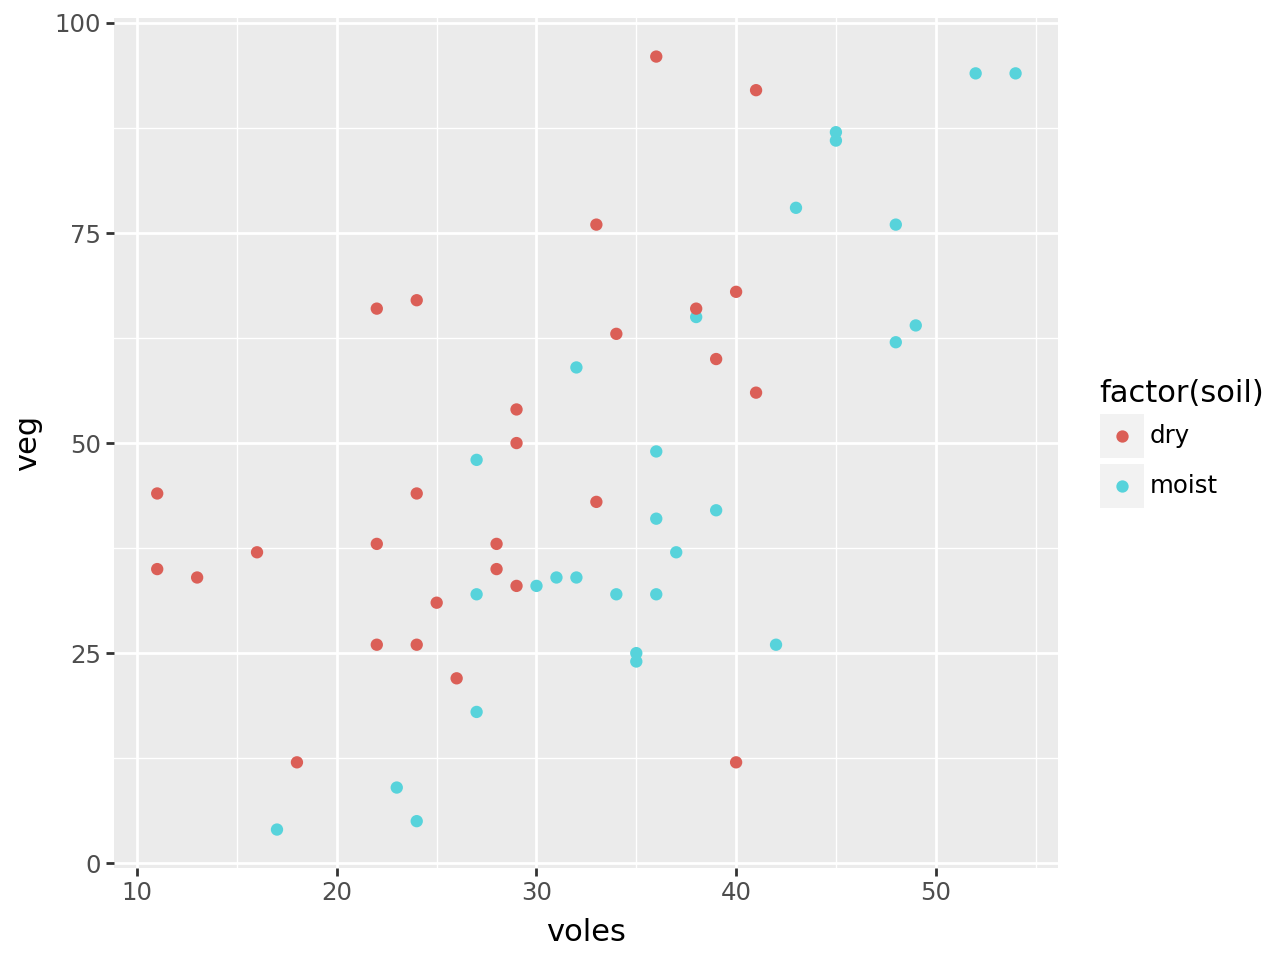

In [17]:
# Creating a simple scatterplot using voles df
ggplot(df_voles, aes("voles", "veg", color="factor(soil)")) + geom_point()


## Modeling

In the cell below, model `voles` with `soil` and `veg` as predictors in a parallel slopes model. 

Here are the steps I would take:
1. Make a column transformer with `make_column_transformer` that transforms `soil` with `OneHotEncoder(drop="first")` and passes 'veg' through untransformed.
2. Create a pipeline with `make_pipeline` using the column transformer from above and `LinearRegression()` as my model. 
3. Get the `X` (training data) and `y` predictor from `df_voles`
4. Use the `.fit()` method for the pipeline to train the model with `X` and `y`. 

In [24]:
# Creating column transformer to transform 'soil' and passthrough 'veg'
ct = make_column_transformer((OneHotEncoder(drop='first'), ['soil']),('passthrough', ['veg']))

In [25]:
# Pipeline creation
pipeline = make_pipeline(ct,LinearRegression())

# Splitting our data to train the model
target = 'voles'

X, y = df_voles.loc[:, df_volves.columns != target], df_voles[target]

In [26]:
# Model trainning
pipeline.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['soil']),
                                                 ('passthrough', 'passthrough',
                                                  ['veg'])])),
                ('linearregression', LinearRegression())])

Use the function below to get the parameter values for your model from above.

In [33]:
def get_regression_table(pipeline):
    terms=list(pipeline['columntransformer'].get_feature_names_out()) + ['intercept']
    mod = pipeline['linearregression']
    estimates = list(mod.coef_) + [mod.intercept_]
    data = dict(
        term=terms, 
        estimate=estimates,
    )
    return pd.DataFrame(data)

In [34]:
# Calling our function to view parameters
get_regression_table(pipeline)

,term,estimate
0,onehotencoder__soil_moist,9.100298
1,passthrough__veg,0.259069
2,intercept,15.464026


❓Would protecting a site with high vegetation cover be a more effective way to preserve the vole population than a site with low vegetation cover? Why?

(**Hint:** use your chart above to answer. It's also possible to leverage your regression parameters if you chose to model `voles` with a parallel slopes model.)

**Answer:** Yes, there appears to be positive correlation against  vegetation and vole population

In [36]:
# Displaying correlation table to further support effectiveness
df_voles.corr(numeric_only = True)

,site,voles,veg
site,1.000000,-0.387738,0.019766
voles,-0.387738,1.000000,0.603710
veg,0.019766,0.603710,1.000000


❓Dry sites typically cost a lot less to purchase and maintain for conservation organizations. Thus, if a conservation organization decides to purchase a few dry sites, roughly what percent cover of vegetation do they need to maintain on these sites (at a minimum) to support a population of about 30 voles at the site?

(**Hint:** In your chart above, draw a line at voles = 30 using `geom_hline` and make a rough estimate for this answer...)

**Answer:** Organizations should maintain roughly 35% coverage of vegetation.

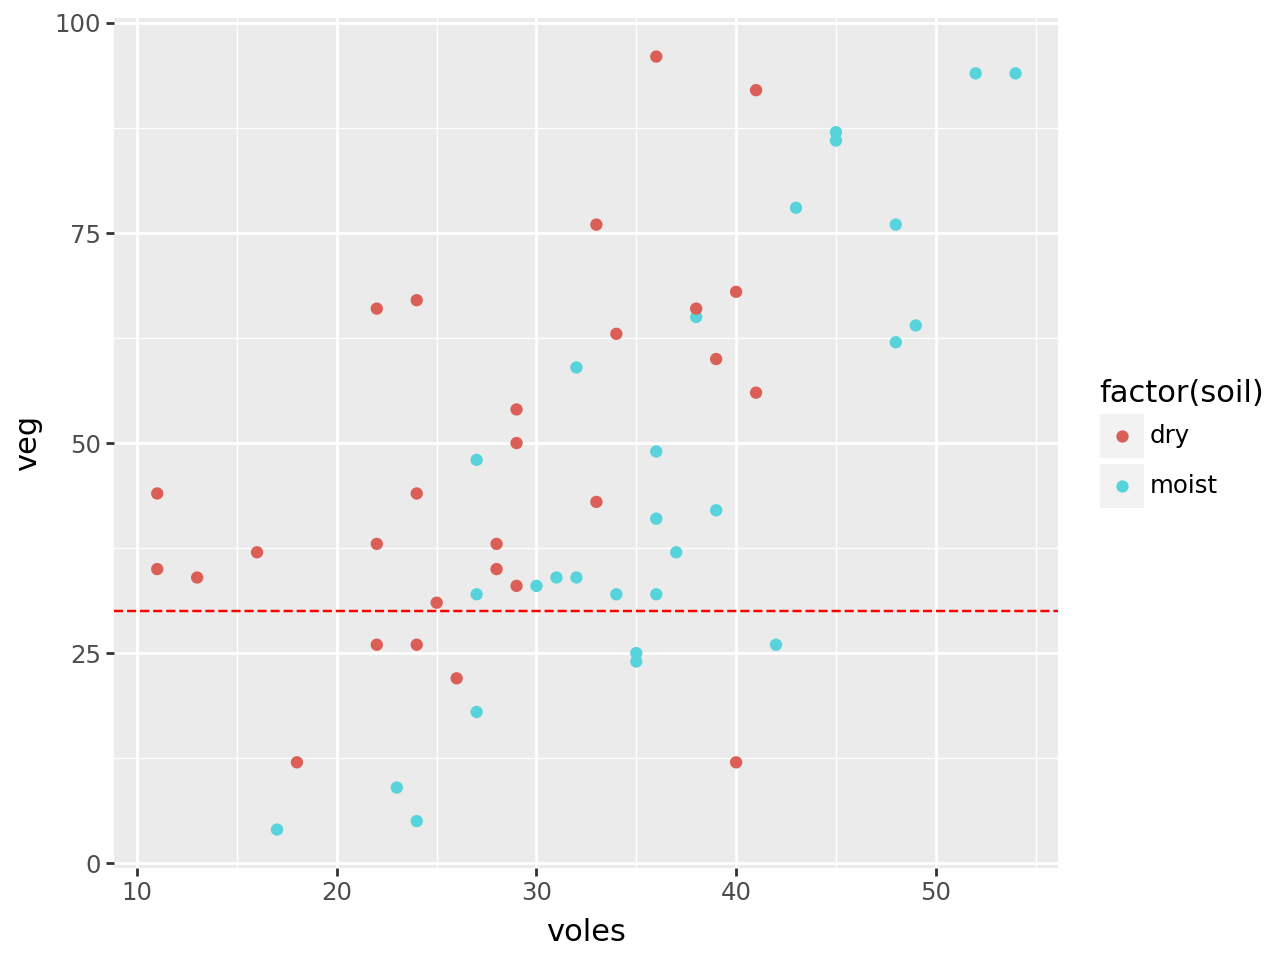

In [40]:
# Plot creation to view target levels
ggplot(df_voles, aes("voles", "veg", color="factor(soil)")) + geom_point() + geom_hline(yintercept=30, linetype='dashed', color='red')

❓The Nature Conservancy is looking at purchasing a site for this species (in the same study area) that has moist soil and 40% vegetation cover. Using the regression equation what would you predict as the possible vole population the site might be able to support?

(**Hint:** Use `.predict(pd.DataFrame({"soil": ["moist"], "veg": [40]}))` with yout pipeline.)

**Answer:** Roughly 35%

In [39]:
pipeline.predict(pd.DataFrame({"soil": ["moist"], "veg": [40]}))

array([34.92708151])